theory_00.ipynb

# What is a Neural Network?

A neural network is... a network of neurons. I am not not joking. A neural network is like a team of decision-makers (neurons), each making a tiny choice based on inputs. Combined, they learn complex patterns — like how you recognize faces or letters.

If you understand how a neuron works, you'll understand how a network of neurons works. So let's first understand how a single neuron works, before understanding how a network of neurons works.

Honestly, we could stop all the theory here by saying the most important thing in AI:
> **A neuron is just a linear function.**

At the beginning of your AI journey, when you are building your first deep learning models, many of your questions can be answered by remembering:
> A neuron is a linear function. Always keep that in mind.

However, HOW the neuron works is slightly different — and that's where confusion often comes from.

So here’s the second most important thing to know about AI:
> **How a deep learning algorithm (from neuron, to neural networks) works is always the same. Always.**

Here’s the architecture:

1) A linear function that processes the input data
2) An activation function
3) A performance measurement
4) An optimization process to improve performance

This structure is always the same for every deep learning algorithm : **it is true for a single neuron, it is true for a neural network.**

What changes is the content: the choice of mathematical models for (1), (2), (3), and (4).

The methodology of the recipe is always the same. What changes is the ingredients you decide to use.

To really understand this, let’s walk through an example.


# Example: A Simple Binary Classification Problem

We will have a look on how this architecture works by taking a binary classification model. Don't be afraid of the terms, they will make sense later. (2min)

What you need to understand is that this model allows for linearly separating two classes.

Suppose we have two types of plants (two classes):
- Toxic plants (labeled $y = 1$, class 1)
- Non-toxic plants (labeled $y = 0$, class 0)

We decide to measure two features:
- $x_1$: the length of the leaves
- $x_2$: the width of the leaves

So each plant can be represented as a data $x = (x_1, x_2)$.

For example, let's say we have this dataset when we plot these measurements :

X shape: (100, 2)
y shape: (100, 1)


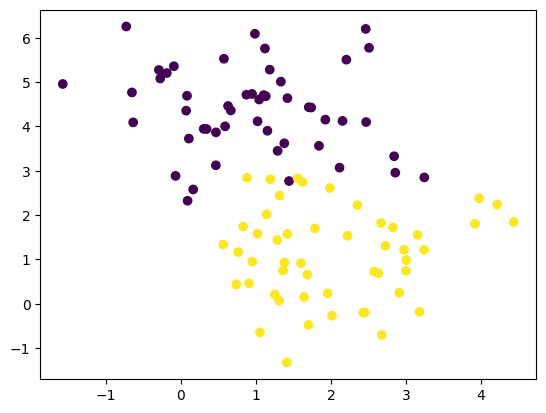

In [2]:
from IPython.display import HTML

HTML('''
<style>
div.input {
    display: none;
}
</style>
''')

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

# Create a scatter plot of the data
print('X shape:', X.shape)
print('y shape:', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

Purple = toxic, class 1 ; and yellow = non-toxic, class 0.

To find the equation of the decision boundary (the line that separates the two kind of plants), we build a deep learning algorithm : a neuron.

This base unity has been thought by Mr.Rosenblatt in 1958. Let's debunk how it works.

## 1. Process the input data: a linear function

Each input $x$ (plant = dot) is multiplied by a weight $w$, and we add a bias term $b$. This is the linear model.

Each input has two features : length and width, so we have to adapt the weights, for them to act on each feature : $w = (w_1, w_2)$. For the bias, it acts on both features at the same time.

Here’s how a neuron looks:

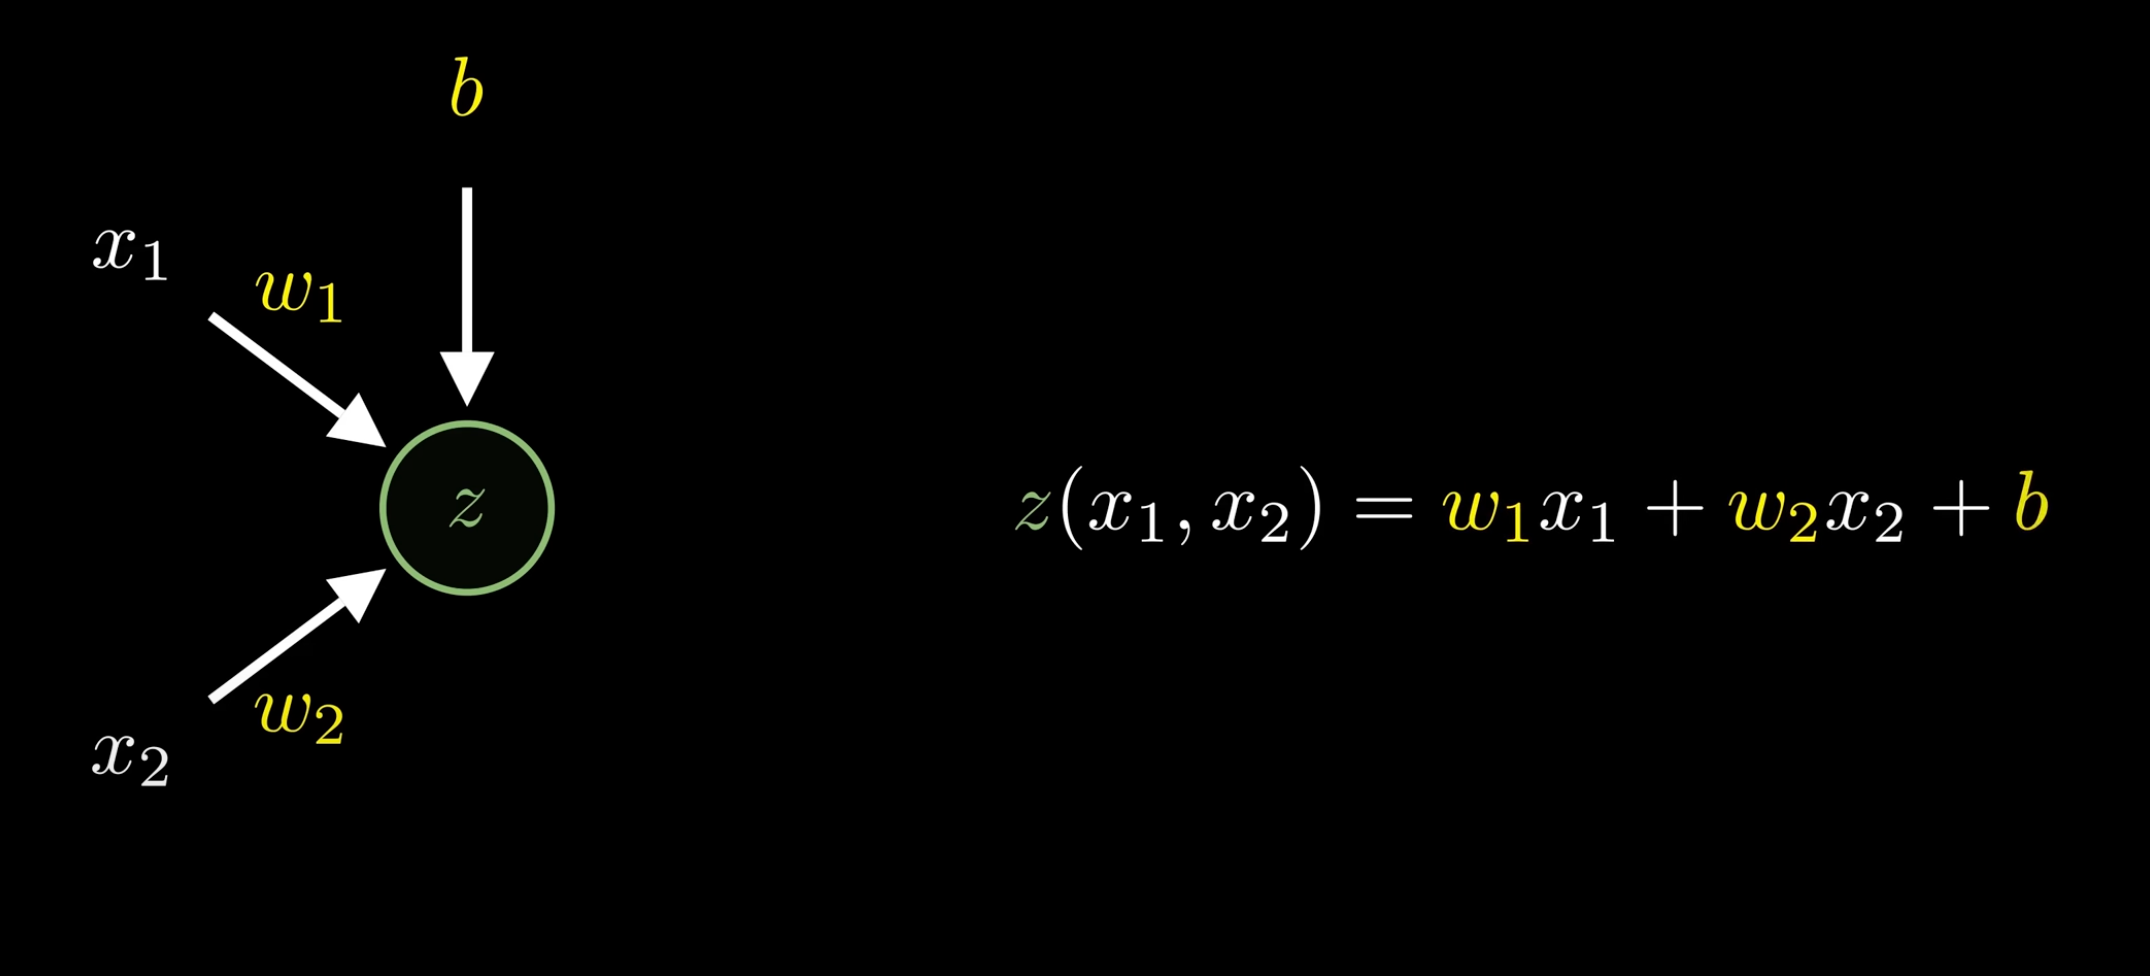

In [1]:
from IPython.display import Image, display

display(Image("/Users/louispierre-c/Desktop/photos_git/neurone.png", width=600, height=400))


> Now you see the linear function on each feature ?

### How Does This Neuron Work?

The output of this neuron gives a output value $z$.

To predict the plant class according to its output value, we need to give a sense to this output value. What does it mean ? How to change it to predict the good class ?

## 2. Adding a Sense of Probability: Activation Functions

To give sense to this output value, we will add an associated probability for each prediction (each output). Indeed, the further a plant is from the decision boundary, the more confident we want to be about its classification. To achieve this, we use an activation function that "activates" the neuron based on a rule, criterion defined by that function. 

For example, we can use the **sigmoid function**. A common choice which maps any output to a probability between 0 and 1.\
If the probability is greater than 0.5, we classify the plant into **Class 1** (e.g., toxic). Otherwise, we classify it into **Class 0** (e.g., non-toxic).\
This gives us a **binary classification model** that predicts which class a plant belongs to based on its attributes. Understand why it is a binary classification problem now ?

While the sigmoid function is commonly used, other activation functions like **ReLU** or **tanh** can also be used. However, the principle remains the same: we apply an activation function to the neuron's output to obtain a probability.

This approach allows us to make more probabilistic predictions, giving us not just the predicted class, but also the certainty (probability) of that prediction.


The sigmoid function is:

$$
a(z) = \frac{1}{1 + e^{-z}}
$$
where **z** is the output of the neuron and e the exponential function.

> Activation functions like the sigmoid help neurons express 'how confident' they are — not just yes/no, but a value between 0 and 1.

# Graph of the Sigmoid Function

Let's visualize the sigmoid function and highlight a specific point (a specific plant). \
Imagine we have a plant that lies in the purple zone. Let's assume that its output value is $z = 2$. By applying the sigmoid function, we get the following result. \
The plant is positioned here on the sigmoid function graph:


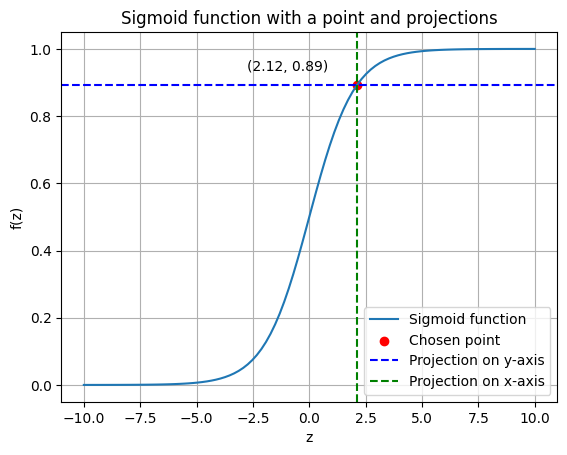

In [13]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-z))

# Pick a specific point on the curve
point_index = 60  
x_point = z[point_index]
y_point = y[point_index]

# Plot the sigmoid curve
plt.plot(z, y, label='Sigmoid function')

# Highlight the chosen point
plt.scatter([x_point], [y_point], color='red', label='Chosen point')

# Add projections on the axes
plt.axhline(y=y_point, color='blue', linestyle='--', label='Projection on y-axis')
plt.axvline(x=x_point, color='green', linestyle='--', label='Projection on x-axis')

# Add annotations
plt.annotate(f'({x_point:.2f}, {y_point:.2f})', (x_point, y_point), textcoords="offset points", xytext=(-50,10), ha='center')

# Graph details
plt.title('Sigmoid function with a point and projections')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.legend()
plt.grid()
plt.show()

> The sigmoid curve starts near 0, rises smoothly, and levels off near 1. Perfect for translating raw scores into probabilities between 0 and 1.

# Interpretation

Suppose our plant has a neuron output $z = 2$.

Applying the sigmoid function, we get a probability of 0.89.

This means our model predicts there's an 89% chance that the plant belongs to class 1.
It's a pretty high probability, which makes sense since the plant is in the purple zone, where we expect to find toxic plants.

Thus, it also predicts a 11% chance that the plant is non-toxic (class 0).

In general:

- Probability of being in class 1: $a(z)$
- Probability of being in class 0: $1 - a(z)$

Mathematically:

$$P(Y=1) = a(z)$$ 
$$P(Y=0) = 1 - a(z)$$

# A Bernoulli Distribution!

Take a closer look : Each plant’s classification follows a Bernoulli distribution with parameter $a(z)$.

$$
P(Y=y) = a(z)^y \cdot (1 - a(z))^{1-y} \quad \text{where} \quad y \in \{0, 1\}
$$


Indeed, if $y = 1$, we have:
$$
P(Y=1) = a(z)^1 \cdot (1 - a(z))^{1-1} = a(z)$$
If $y = 0$, we have:
$$
P(Y=0) = a(z)^0 \cdot (1 - a(z))^{1-0} = 1 - a(z)$$
This means that the output of our neuron is a Bernoulli distribution with parameter $a(z)$.

> A Bernoulli distribution models binary outcomes — like flipping a coin, or classifying yes/no. A sigmoid function helps model this kind of decision.

Okay now we have the model that processes and give sense to an input data. But how to judge the result ? How to tell the neuron it did a good or a bad job ? How to reward ? How to punish ?

In a nutshell (lol), **How to Evaluate the Model?**

## 3. Performance measurement

Now that we have a working model, how good is the model at making correct predictions ? How to evaluate its performance ?

By adjusting the parameters $w$ and $b$ to minimize errors between the model output and the real labels.

For that **we need to define a function that quantifies the difference between the predicted probabilities and the true labels.** To do that we calculate the **likelihood**. Likelihood tells us how plausible our model's predictions are given the data we consider as true. For example, if a plant is toxic and the model returns a probability of toxicity equal to 89%, then it is itself plausible at 89%.

To calculate the likelihood of our model, we take all the probabilities associated with each plant, we simply multiply them :

$$
L(W, b) = \prod_{i=1}^{N} P(Y = y_i)
$$

> This is the product of the probability that each plant (from plant $1$ to plant $N$) belongs to the class 1, the toxic class.

Since these probabilities follow a Bernoulli distribution, we can write the likelihood $L(W,b)$ of our model as follows:

$$
L(W, b) = \prod_{i=1}^{N} P(Y = y_i) = \prod_{i=1}^{N} a(z_i)^{y_i} \cdot (1 - a(z_i))^{1-y_i}
$$
where:
- $N$ = number of plants
- $y_i$ = true label for plant $i$
- $z_i$ = output for plant $i$

> But we have a problem. Do you see it ?

### Problem: Likelihood Gets Tiny!

We have a problem: likelihood is a product of probabilities that are between 0 and 1. If we have many plants, this product will be very small and therefore difficult to handle.\
As $N$ increases, the product of small numbers becomes extremely small:
$$ \lim_{N \to \infty} L(W,b) = 0 $$

This is hard to work with numerically.

> When multiplying many small probabilities, the result becomes smaller and smaller (numerical underflow). That’s a problem for computers.

We have to find a solution that keeps this measurement (product of all probabilities), but keeps the handling number to work with.

### Solution: Shift to Logarithm

In mathematics, we can shift a product to a sum by using the logarithm function.

$$
\log(L(W, b)) = \log\left(\prod_{i=1}^{N} P(Y = y_i)\right) = \sum_{i=1}^{N} \log(P(Y = y_i))
$$

That's why the loss function becomes the **log-likelihood** function:
$$
\mathcal{L}(W, b) = \sum_{i=1}^{N} \log(P(Y = y_i)) = \sum_{i=1}^{N} \left( y_i \cdot \log(a(z_i)) + (1 - y_i) \cdot \log(1 - a(z_i)) \right)
$$

> Taking the logarithm of probabilities turns products into sums — making things more stable and easier to compute.

### Defining the Loss Function

This likelihood function is called the cost or loss function. It allows us to quantify the error between the model's predictions and the true data. The higher the likelihood, the better the model's performance.

Therefore, we need to maximize this likelihood to obtain the best possible model.

But in data science, we never aim to maximize; we aim to minimize. So, we take the opposite approach.

We add a negative sign and a factor of $1/N$ normalize the loss function so that it falls between 0 and 1. Nothing more.

> The loss function tells us 'how wrong' the model is. Log-loss punishes confident but wrong predictions heavily.

We will define the **log-loss function** as follows:

$$
\text{Log-loss} = - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot \log(a(z_i)) + (1 - y_i) \cdot \log(1 - a(z_i)) \right)
$$

Where:

- $N$ = Number of plants
- $y_i$ = True label for plant $i$
- $a(z_i)$ = Predicted probability for plant $i$ to be toxic or not


Noz, we have a model to process the input data, a way to give sense to the output value, and a way to evaluate the model performance.

We want this architecture to be the best possible, so we need to optimize it. To optimize it, we need to minimize the log-loss function. To minimize it, we need to adjust the parameters $w$ and $b$ so that they give the best processing of the input data.

## 4. Gradient Descent

We use the **Gradient Descent** algorithm — one of the most important algorithms in deep learning.

Gradient Descent adjusts the parameters $w$ and $b$ to minimize the loss function (log-loss here).

But first, we need to know: How does the Log-Loss change when we slightly change $w$ or $b$? That way we can adjust them in the right direction.

Answer: we calculate the **gradient** (the derivative).

> Gradient descent is like skiing down a hill: you go in the direction that reduces the friction (the error) the most, to maximize your speed and win the competition.

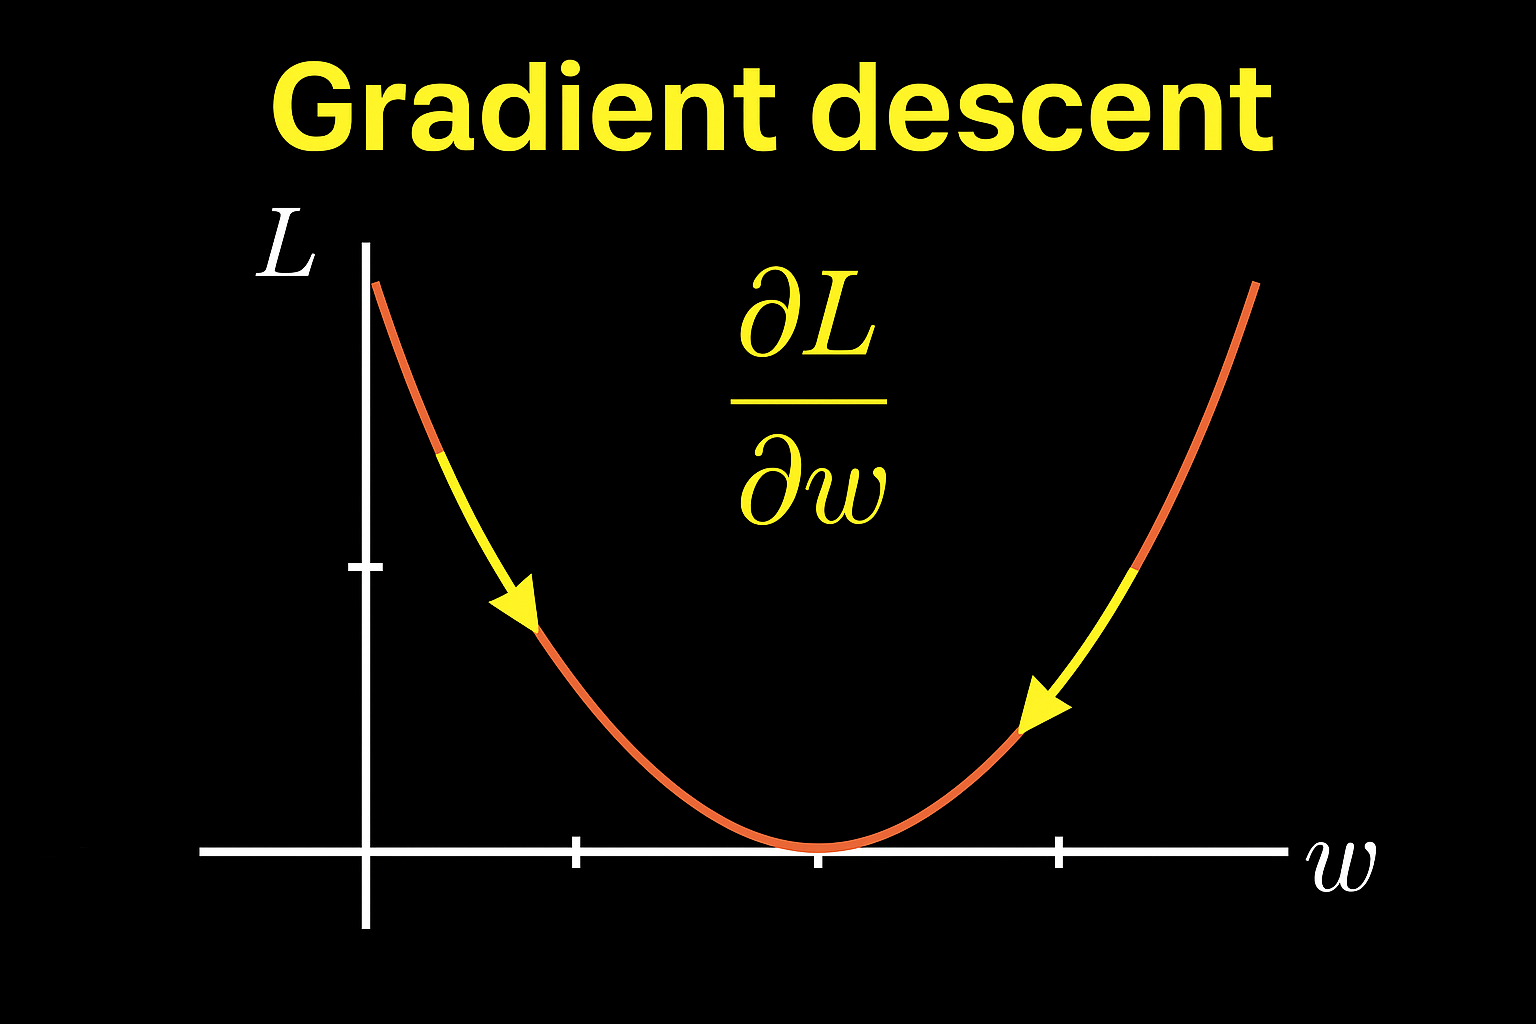

In [14]:
from IPython.display import Image, display

display(Image("/Users/louispierre-c/Desktop/photos_git/gradient.png", width=400, height=300))

**Important :** The derivative of a function indicates how that function changes. If, when $w$ increases, the derivative is negative, it means the function is decreasing and we need to increase $w$ in order to minimize the cost function. Conversely, if the derivative is positive, it means the function is increasing, and we need to decrease $w$ to minimize the cost function.


We will now calculate the derivative of the loss function with respect to $w$ and $b$.

$$
\frac{\partial L}{\partial W},  \frac{\partial L}{\partial b}
$$

where $L$ is the cost function, $W = (w_1, w_2)$ is the weight vector, and $b$ is the bias.

When we computed these derivatives, we can use them to update the parameters $W$ and $b$ using the following formulas:

$$
W = W - \alpha \cdot \frac{\partial L}{\partial W}
$$

$$
b = b - \alpha \cdot \frac{\partial L}{\partial b}
$$

where $\alpha$ is the learning rate.


We can clearly see here that the update of the parameters $w$ and $b$ depends on the derivative of the cost function with respect to $w$ and $b$. Refer to the explanation above if needed.


### You completed a deep learning algorithm

Ola ola... wait.. We've finished the neuron architecture!

Here's what we've just covered:
1) A mathematical model that processes the input data: the linear binary classification model
2) An activation function: the sigmoid function
3) A performance measure (or cost function): the log-loss
4) An optimization of this performance: gradient descent


BUT you haven't yet understood how this architecture works. But don't worry, it's normal. We're going to go through it together.

To understand how this architecture works, we need to implement all these functions in a learning loop to train the model. Of course because now we have a new set of parameters: the new weights $w$ and the new bias $b$ !!

## **Wait wait... really ?**

Yeah.. the usual deep learning book would stop here and tell you the gradients. It would say: using these gradients find by... who ?! The author ? The teacher ? The internet ?!

You really want to feel like someone who knows what he's doing, right ? You don't want to be a parrot that repeats what others say.

We are going to calculate the gradients ourselves.

It's math, it's not fun, but it's necessary. So stop complaining and act for your self-taught learning journey.


## 5. Now it is time for you to listen carefully.

To do this, we will start from the loss function and calculate the gradients with respect to $w$ and $b$. Specifically, we need to calculate these 3 gradients:
1) The gradient of the loss function with respect to $w_1$
2) The gradient of the loss function with respect to $w_2$
3) The gradient of the loss function with respect to $b$

In mathematical terms, we are going to calculate the following gradients:
$$
\frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \frac{\partial L}{\partial b}
$$


To do this, we will use the chain rule. The chain rule is a differentiation rule that allows us to calculate the derivative of a composed function. In simple terms, if we have a function $f(g(x))$, we can calculate the derivative of $f$ with respect to $x$ by multiplying the derivative of $f$ with respect to $g$ by the derivative of $g$ with respect to $x$. In simpler terms, it allows us to break down complex derivatives into simpler parts, which is exactly what we need to do here.

We will apply the chain rule to our loss function. Therefore, we will calculate the following gradients:

$$
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1}
$$
$$
\frac{\partial L}{\partial w_2} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_2}
$$
$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial b}
$$

> see how each gradient is a product of 3 simpler gradients ?

## $\frac{\partial L}{\partial w_1}$ Computation

Let's go for the first one. We want to compute the following:

$$
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1}
$$

It seems complicated, but it is not. We know the expressions that link each function together. Remember that we have a linear function that processes the input data, an activation function, and a loss function.

- The linear function is $z = w_1 \cdot x_1 + w_2 \cdot x_2 + b$
- The activation function is $a(z) = \frac{1}{1 + e^{-z}}$
- The loss function is $\mathcal{L}(W, b) = \sum_{i=1}^{N} \left( y_i \cdot \log(a(z_i)) + (1 - y_i) \cdot \log(1 - a(z_i)) \right)$


Let's calculate the small gradients one by one.
### 1) $\frac{\partial L}{\partial a}$
We have the following loss function:
$$
\mathcal{L}(W, b) = \sum_{i=1}^{N} \left( y_i \cdot \log(a(z_i)) + (1 - y_i) \cdot \log(1 - a(z_i)) \right)
$$
We can see that the loss function is composed of two parts: the first part is $y_i \cdot \log(a(z_i))$ and the second part is $(1 - y_i) \cdot \log(1 - a(z_i))$. The derivatives of rhese ineer parts are what we need to calculate.
We can calculate them using the logarithm properties. The derivative of the logarithm function is:
$$
\frac{\partial L}{\partial a} = \frac{\partial L}{\partial a(z)} = \frac{y_i}{a(z)} - \frac{1 - y_i}{1 - a(z)}
$$

> yeah, the derivative function of the log function is the function $\frac{1}{x}$

### 2) $\frac{\partial a}{\partial z}$
The sigmoid activation function is defined as:
$$
a(z) = \frac{1}{1 + e^{-z}}
$$
Where $a(z)$ is the activation function, and $z$ is the output of the neuron.
We can compute the gradient of the activation function with respect to its input as:

> remember your damn derivative rules ($\frac{\partial}{\partial z} \frac{1}{u(z)} = \frac{-1}{u^2} \cdot \frac{\partial u}{\partial z}$), moreover, there's a trick later.

$$
\begin{aligned}
\frac{\partial a(z)}{\partial z} &= \frac{\partial}{\partial z} \left(\frac{1}{1 + e^{-z}}\right)\\
&= \frac{-1}{(1 + e^{-z})^2} \cdot \frac{\partial}{\partial z} (1 + e^{-z})\\
&= \frac{-1}{(1 + e^{-z})^2} \cdot (-e^{-z})\\
&= \frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}}
\end{aligned}
$$
> And now you can see that the first term is the activation function

$$
= a(z) \cdot \frac{1}{1 + e^{-z}}\\
$$
> the trick is to bring up the activation on the second term by doing this simple trick: $e^{-z} = e^{-z} + 1 - 1$ 

$$
\begin{aligned}
&= a(z) \cdot \frac{e^{-z} + 1 - 1}{1 + e^{-z}}\\
&= a(z) \cdot (\frac{1 + e^{-z}}{1 + e^{-z}} - \frac{1}{1 + e^{-z}})
\end{aligned}
$$
> the first term in the parentheses simplifies to 1, and we can see the activation for the second term

$$
= a(z) \cdot (1 - a(z))\\
$$

### 3) $\frac{\partial z}{\partial w_1}$
We have the following linear function:
$$
z = w_1 \cdot x_1 + w_2 \cdot x_2 + b
$$
We can calculate the derivative of the linear function with respect to $w_1$ as follows:
$$
\frac{\partial z}{\partial w_1} = x_1
$$
This is the derivative of the linear function with respect to $w_1$.

### We can now begin the development of $\frac{\partial L}{\partial w_1}$ :

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \omega_1} & =\frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1} \\
& =\left(-\frac{1}{m} \sum_i y_i \frac{1}{a_i}+\left(1-y_i\right) \times-\frac{1}{1-a_i}\right) \times e^{-z}\left(1+e^{-z}\right)^{-2} \times x_1 \\
& =\frac{-x_1}{m} \sum_i\left(\frac{y_i}{a_i}+\frac{\left(y_i-1\right)}{1-a_i}\right) \frac{e^{-z}}{\left(1+e^{-z}\right)^2} \\
& =\frac{-x_1}{m} \sum_i\left(\frac{y_i-y_i a_i+a_i y_i-a_i}{a_i\left(1-a_i\right)}\right) a(z) \frac{\left(e^{-z}+1\right)-1}{1+e^{-z}} \\
& =\frac{-x_1}{m} \sum_i\left(\frac{\left(y_i-a_i\right)}{a_i\left(1-a_i\right)}\right) a(z) \times(1-a(z)) \\
& =\frac{-x_1}{m} \sum_i\left(\frac{\left(y_i-a_i\right)}{a_i\left(1-a_i\right)} \times a_{i j}\left(1-a_i\right)\right) \\
& =-\frac{x_1}{m} \sum_i^m\left(y_i-a_i\right) \\
\end{aligned}
$$
Thus, we obtain the gradient of the cost function with respect to $w_1$:
$$
\left[\frac{\partial \mathcal{L}}{\partial w_1}=-\frac{x_1}{m} \sum_i\left(y_i-a_{i}\right)\right]
$$

## $\frac{\partial L}{\partial w_2}$ Computation

Similarly, we can calculate the gradient of the loss function with respect to $w_2$:
$$
\left[\frac{\partial \mathcal{L}}{\partial w_2}=-\frac{x_2}{m} \sum_i\left(y_i-a_{i}\right)\right]

$$



## $\frac{\partial L}{\partial b}$ Computation

For the gradient of the loss function with respect to $b$, we can observe that:
$$
\frac{\partial z}{\partial b} = 1
$$

By following the same approach as for the other gradients, we obtain the gradient of the cost function with respect to $b$ as:
$$
\left[\frac{\partial \mathcal{L}}{\partial b}=-\frac{1}{m} \sum_i\left(y_i-a_{i}\right)\right]
$$

And there you have it, we now have all the gradients of the loss function with respect to $w$ and $b$. We can now use these gradients to update the parameters $w$ and $b$ during the learning loop.

We will update the parameters $w$ and $b$ using the following formulas:
$$
w_1 = w_1 - \alpha \cdot \frac{\partial L}{\partial w_1}
$$
$$
w_2 = w_2 - \alpha \cdot \frac{\partial L}{\partial w_2}
$$
$$
b = b - \alpha \cdot \frac{\partial L}{\partial b}
$$


That's it!! Phew, this was really the hardest part to understand.

You don't realize what you've just done, but let me tell you that 90% of the students in my engineering school don't know how to do this.

Now, all that's left is to code everything into a learning loop in order to train this neuron. 

You'll see how the neuron learns by itself using what we just covered.


**Head over to the practice_00 notebook to code this very same neuron capable of classifying toxic and non-toxic plants!**